# Visualizing Data in Python
---
One of the most frequent (and most important I'd say) uses of computational systems is to visualize data. Python has a host of different ways to do this, but we'll focus mostly on `matplotlib` here. If you are interested in investigating other libraries, feel free to check out `Bokeh`, `Altair`, or `Plotly`. I'll always be fine with you using whatever method you want, but some libraries lack certain capabilities currently.

<div class='alert alert-success'>
<b>Today's Goal</b>: To be proficient in creating a variety of basic plots in Python using Matplotlib.
</div>
<br>

#### Table of Contents:
0. [Importing Libraries](#importing)
1. [Basic Plotting](#2d)
2. [Contours and Quivers](#3var)
3. [Vector Plots](#vplots)

## 0. Importing libraries <a name='importing'></a>
We really don't need to many libraries to get started. What is important is that you call `%matplotlib inline`, or else your created plots will open up in new windows instead of being embedded in the notebook. (Actually, this might not strictly be true with more recent versions of Matplotlib which might default to this in a Jupyter notebook, but you can't go wrong including it!)

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

# Also importing numpy for working with arrays
import numpy as np

You can also choose a general theme for your plots. I like the `seaborn-darkgrid` for most of my plots, but you can run `plt.style.available` to see all the available styles and play around to find one you like!

In [2]:
plt.style.use('seaborn-darkgrid')

<div class='alert alert-danger'>
     Throughout this notebook, remember that you can always add a question mark to the end of a command to pop up a help window. Eg:
     <br>
     <code>some.command?</code>
     <br>
     It is almost always faster than trying to look everything up on Google!
</div>

## 1. Plotting 2 Variables <a name=2d></a>
At its most basic, we want to be able to construct plots of two variables: one independent and one dependent. Most frequently, we will have some list or array of independent variables ($x$) and have some function which is returning us a list or array of dependent variables ($y$). For instance, lets look at the function
$$ f(x) = 5(x-2)^3 $$
We'll define our function and then generate our $x$'s and $y$'s:

In [3]:
# Definiting the function
def f(x):
    return 5*(x-2)**3

# Independent variable
xs = np.arange(-5,5,0.1)
# Dependent variable
ys = f(xs)

Now the plotting is straightforward:

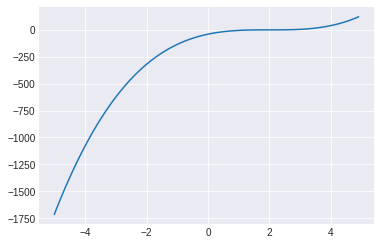

In [4]:
plt.plot(xs, ys)

If we want to change features of the plotted series (such as its color or markings) we add parameters to the `plt.plot()` command. If we want to add features to the *entire plot* (such as axis labels or a title), we add additional `plt` commands below `plt.plot()` in our cell. **All commands for a plot must be within the same cell!** For example, we could do:

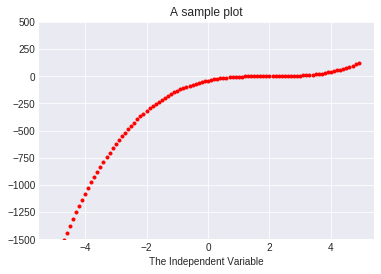

In [5]:
plt.plot(xs, ys, '.', color='red') # I want dots that are red
plt.xlabel('The Independent Variable') # Labeling my axes like a boss
plt.ylim(-1500,500) # Directly setting the y min and maxes visible
plt.title('A sample plot') # Most things need a good title
plt.show() # This is the official way to display a plot, and gets rid of the odd output

A few other things I'll make clear before you try it yourself. You can adjust the size of your plot with `plt.figure` at the start. And you can totally use LaTeX equations in your titles or labels. Finally, if you want to have multiple plots on the same figure, just add more! You just need to make sure to give them a `label` and then add a legend to your plot.

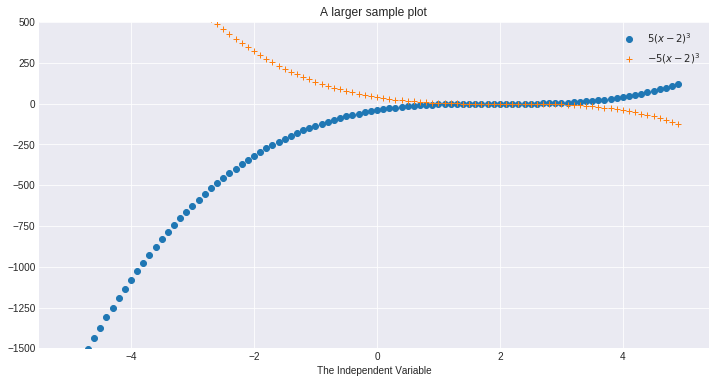

In [6]:
plt.figure(figsize=(12,6)) # Give me a plot 12 units across and 6 units tall
plt.plot(xs, ys, 'o', label='$5(x-2)^3$') # Drawing plots and including LaTeX labels
plt.plot(xs,-ys, '+', label='$-5(x-2)^3$')
plt.xlabel('The Independent Variable')
plt.ylim(-1500,500)
plt.title('A larger sample plot')
plt.legend() # Multiple plots mean you need a legend!
plt.show()

### <font color='orange'>Your Turn</font>
Construct a plot of
$$ f(x) = x^2 + (25\mathrm{m^2})\sin^2\left(\frac{x}{2\mathrm{m}}\right) $$
and
$$ g(x) = 100\mathrm{m^2} - \frac{x^2}{2\mathrm{m^2}} $$
over the interval $x=[-10,10]$ meters in 0.5 meter increments. Use triangle marks of any color for $f(x)$, and any style of mark and color for $g(x)$. Make sure your plot has all axes labeled (including units!), a title, and a meaningful legend!

In [7]:
def f(x):
    return #Your code

def g(x):
    return #Your code

# Your plotting code

## 2. Plotting 3 Variables <a name='3var'></a>
In many cases, we don't have just one dimensional data (especially in this class!). We might know something about the electric potential at a certain point in space. Which means we could have 2 (or 3) independent variables along with the dependent variable. Here we'll look at methods to visualize that sort of data.

### The setup
Before we can plot anything, we need to worry about generating the data to plot! Let's look at the function:
$$ U(x,y) = 2(x^4+y^4)e^{-(x^2+y^2)/5} $$
where $x$ and $y$ are in dimensions of meters and the 2 is in whatever units are necessary to make $U$ a potential energy. We want to visualize the potential energy over some space in $x$ and $y$. We can define our function as we normally do, except now it is a function of two variables:

In [9]:
def U(x,y):
    return 2*(x**4+y**4)*np.exp(-(x**2+y**2)/5)

To visualize this, we need to calculate the potential energy at each point in space. Say we want to visualize from -5m to 5m in 10cm increments in both the $x$ and $y$ direction. One way we could calculate all the needed potentials is by using a nested `for` loop, looping over all the possible points in both the $x$ and $y$ directions. And this would totally work. But we can simplify this by using Numpy's `meshgrid` function:

In [10]:
xs = np.arange(-5,5, 0.1) # Measurement points in X
ys = np.arange(-5,5, 0.1) # Measurement points in Y
Xgrid, Ygrid = np.meshgrid( xs, ys) # Generating the grid
print(Xgrid)

[[-5.  -4.9 -4.8 ...  4.7  4.8  4.9]
 [-5.  -4.9 -4.8 ...  4.7  4.8  4.9]
 [-5.  -4.9 -4.8 ...  4.7  4.8  4.9]
 ...
 [-5.  -4.9 -4.8 ...  4.7  4.8  4.9]
 [-5.  -4.9 -4.8 ...  4.7  4.8  4.9]
 [-5.  -4.9 -4.8 ...  4.7  4.8  4.9]]


Meshgrid can be difficult to understand, so I displayed `Xgrid` above to help. All meshgrid really does is create two matrices: one which holds the x values of each point and one that holds the y values at each point. In the above we can see that `Xgrid` has the same value in each column, because each point in a column is at the same $x$ coordinate. Numpy can handle functions of matrices (arrays), so this means that we can simply pass both results of `meshgrid` to our function to return the potential energy at **all** our desired points:

In [11]:
AllPotentials = U(Xgrid, Ygrid)

### Heat/Height Maps
It can be tough to check our answer without visualizing it in some way (hence part of the power of visualization!). To start we'll just visualize things with a simple heat/height map:

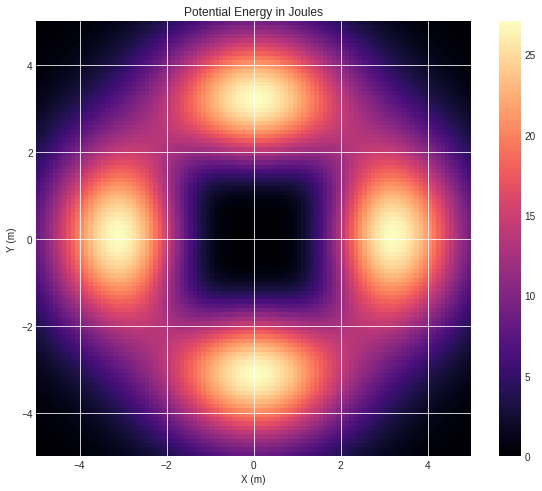

In [12]:
plt.figure(figsize=(10,8))
plt.imshow(AllPotentials,
           cmap = 'magma', #setting the color map
           origin = 'lower', # IMPORTANT, or else the upper left will be your origin!
           extent = [-5,5,-5,5], # imshow doesn't know the boundaries otherwise
          )
plt.colorbar()
plt.title('Potential Energy in Joules')
plt.xlabel('X (m)')
plt.ylabel('Y (m)')
plt.show()

`Imshow` has a few oddities that I described above in the comments. In particular, be wary of the origin flip and the fact that you must set an `extent` to get the proper axis ticks. Try commenting out any of those rows to see what they change (But realize that the origin flip won't be visible here because of the symmetry.) Also note that **making an imshow image without a colorbar is akin to failing to include units in your calculation! Don't do it!**

### <font color='orange'>Your Turn</font>
Image the function
$$ W(x,y) = 5\left(-x^3 + \frac{4}{3}y \right) e^{-(x^2 + y^2)/2} $$
over the square interval from -3 to 3 in whatever increments you want. You can assume that $x$ and $y$ are in meters and $W$ will be in joules. Choose a nice colormap, make sure your axis ticks are correct and labeled, and don't forget a colorbar!

(*A note on colormaps. You can find a nice reference [here](https://matplotlib.org/examples/color/colormaps_reference.html). When choosing a map, always think about the data being presented. If it is a continuous, always increasing value, the defaults are probably fine. But if you have some divergence (like positive and negative charge), you might want to choose a diverging map to highlight those differences. If you need still more colormaps, check out the seaborn package.*)

In [13]:
def W(x,y):
    return # Your code here

# Meshgrid code

# Visualizing code


### Contour Plots
In some cases, it can be cleaner or more clear to use a contour plot instead of a height map. The data preparation is identical to that of the height map, so we are free to just construct the plot.

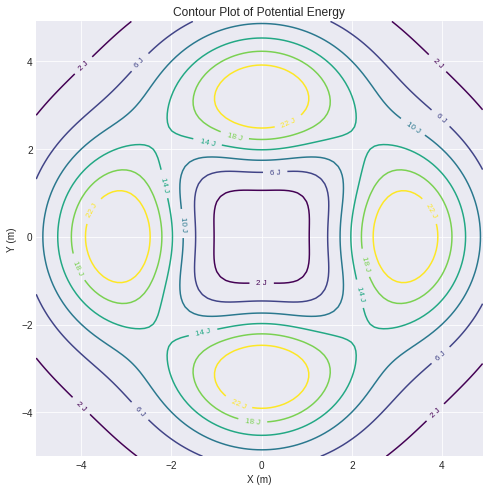

In [15]:
plt.figure(figsize=(8,8))
cs = plt.contour( # Note we are specifically naming this to reference in the next command
    Xgrid, # array of x positions
    Ygrid, # array of y positions
    U(Xgrid, Ygrid), # the function or 'z' values
    np.arange(2,26,4), # A number of desired contours or a list of exactly what contours
    cmap='viridis', # a colormap, if want single color use colors='black'
)
cs.clabel( # adds text labels to our contours
    inline = True, # inserts the label in a gap in the contour
    fontsize = 8, # sets the label size
    fmt = '%0.0f J', # sets the format of the string. Could usually just take default
)
plt.xlabel('X (m)')
plt.ylabel('Y (m)')
plt.title('Contour Plot of Potential Energy')
plt.show()

Some benefits of contour plots over height maps include not having to specify the origin or extent. Plus in many situations they more clearly show the exact levels without having to rely on an imprecise color bar. 

*Often the nicest results can be had by using both, plotting the height map and then overlaying a contour plot on top of that.*

### <font color='orange'>Your Turn</font>
Replicate your height map of the function $W(x,y)$ from earlier, but in addition add a contour plot on the top. Plot 10 contours and make sure you label them. You may want to copy and paste your height map code from earlier and extend that, which is totally fine. Note that you'll probably want to choose a nice constant color for your contours here, since the height map will also be changing color.

In [16]:
# Your code here

### 3D Plots
One of the last ways we can represent data in this format is with an actual 3D plot. These come with some caveats however:
* In many cases, a 3D plot might look pretty but might not actually convey the important information as well
* There are some slightly different steps and syntax to making a 3D plot

Those stated, there are plenty on instances where the overall data just can't be understood in 2D slices, so 3D plots have their place. Documentation for 3D plots can be found [here](https://matplotlib.org/mpl_toolkits/mplot3d/tutorial.html). To get started, we'll need to import the 3D axis toolkit:

In [18]:
from mpl_toolkits.mplot3d import Axes3D

Now, the 3D plotting isn't too different, but it does require a little different format from what we've used above. So, to make a 3D plot of our potential $U$:

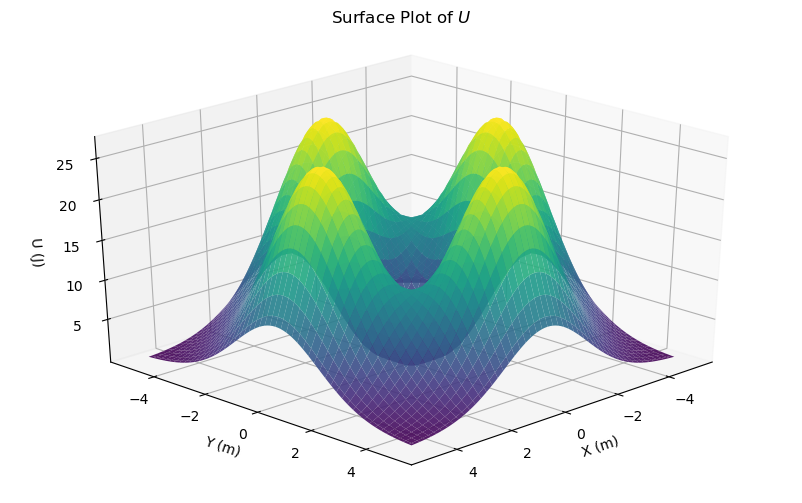

In [19]:
plt.style.use('default') # returning to default style here, as some others look weird in 3D
plt.figure(figsize=(10,6)) # Set the figure size as per normal
ax = plt.subplot( # We need to create a named 'subplot' of 1 here to specify the projection
    111, # This is shorthand for a 1x1 grid of plots, where this is the 1st one
    projection='3d', # This important bit, the projection must be 3D!
)
ax.plot_surface( # Command to plot a surface. Note it has the above name as the start!
    Xgrid, # Our x values array
    Ygrid, # Our y values array
    U(Xgrid,Ygrid), # Our z values array
    cmap='viridis', # Choose your colormap
    alpha=.9, # alpha is how opaque the surface is. This makes it 10% transparent
)
# Need to label axes differently in 3D plots
ax.set_xlabel('X (m)')
ax.set_ylabel('Y (m)')
ax.set_zlabel('U (J)')
ax.set_title('Surface Plot of $U$', pad=30)
# If you want to rotate the view around, elev is tilt and azim is swivel
ax.view_init(elev=30, azim=45)

# Fun extra, you can plot contours (or height maps) on various planes
# Uncomment the below if you want to see the effect
#ax.contour(Xgrid, Ygrid, U(Xgrid,Ygrid), zdir='z', offset=0, cmap='viridis')

plt.show()

### <font color='orange'>Your Turn</font>
Create a 3D plot of the function $W(x,y)$. Make sure your axes are labeled, and choose a view that best shows the scene. You may want to play around with the transparency as well.

In [20]:
# Your code here

## 3. Vector Plots <a name='vplots'></a>
All the above plotting methods work great for when you only have 1 dependent variable to show. But what about in the case of vector functions? Here you are returning a vector, which would have 2 to 3 or more components. We could plot the *magnitude* of the vector for instance as a contour plot, but we couldn't show both the $x$ and $y$ components of the vector in a contour plot. One method to nicely display this type of data is with what are commonly called vector plots, and in `matplotlib` are known as quiver plots.

In [22]:
plt.style.use('seaborn-darkgrid') # Setting this back to my preferred style

Let us take the vector function $\vec F (\vec{a})$:
$$ \vec F(\vec a) = 5a_x^2a_y \,\boldsymbol{\hat{x}} + (a_x^3 - a_y^2a_x) \boldsymbol{\hat{y}} $$
At each point in space we have two vector components to show. Our initial setup will look very similar to what we did above, except our function will now return *two* values: both the $x$ and $y$ component.

In [23]:
def F(a):
    ax = a[0] # Just defining these to be perfectly clear
    ay = a[1]
    return 5*ax**2*ay, ax**3-ay**2*ax

Since we want to visualize the function over a 2D space, we'll still need to use meshgrid to generate our coordinates. Here we'll go over the interval from -2 to 2 in steps of 0.2.

In [24]:
xs = np.arange(-2,2,0.2)
ys = np.arange(-2,2,0.2)
Xgrid, Ygrid = np.meshgrid(xs, ys)

Now we can run everything through our function as before. An important point: we made our function F be a function of just a single **vector** $\vec a$, so when passing it components we need to do so as a list or tuple:

In [25]:
Fxs, Fys = F((Xgrid,Ygrid))

Now that we have our $x$ and $y$ components of $F$ all through the desired space, we can go ahead and use a quiver plot to visualize the vector field.

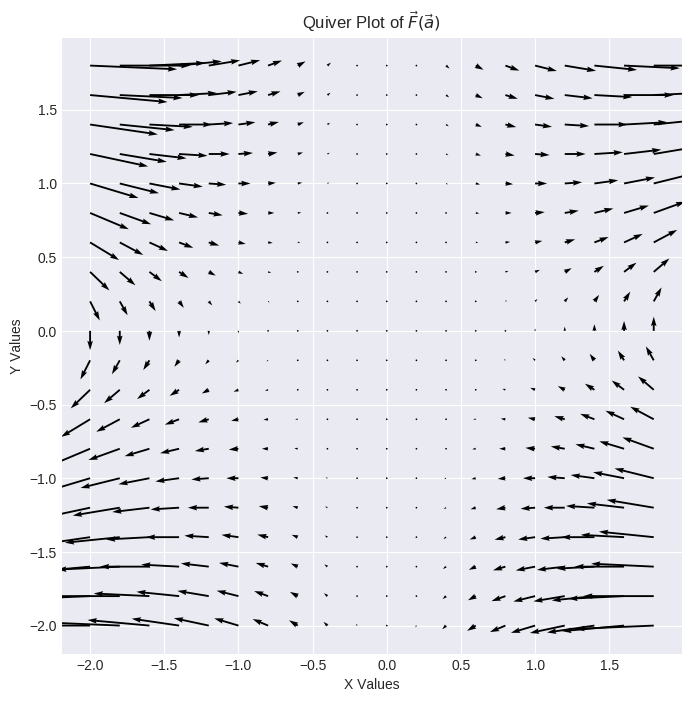

In [26]:
plt.figure(figsize=(8,8))
plt.quiver(Xgrid, # The array of x coordinates
           Ygrid, # The array of y coordinates
           Fxs, # The array of x components of F
           Fys, # The array of y components of F
)
plt.xlabel('X Values')
plt.ylabel('Y Values')
plt.title(r'Quiver Plot of $\vec F(\vec a)$')
plt.show()

You can add extra arguments if you want to color the arrows by their magnitude, set where the arrow starts from, or to tweak the automatic scaling. See the documentation for examples how.

### <font color='orange'>Your Turn</font>
Create a quiver plot for the function $\vec G (\vec b)$, where
$$ \vec G (\vec b) = b_y\cos(b_x) \,\hat{x} + b_x\sin(b_y) \,\hat{y} $$
over the square interval -2$\pi$ to 2$\pi$ and centered at the origin. Don't choose too small an interval spacing, or you are going to have too many arrows to make sense of your image!

In [27]:
# Your code here

### Full 3D Vector Plots
Finally, a nice aspect about quiver plots is that we can plot a full three dependent variables with three independent variables. This is a lot of information to put on a single plot however, and it is easy to end up with a plot that is not easily readable. For this sort of data presentation, I'd usually recommend something more animated or interactive like a Vpython scene.

Creating a 3D quiver plot really just uses information we've already covered, just with an added dimension. Make sure that the `Axes3D` function is still imported from the 3d toolkit, and then see if you can use what you know and the documentation of make a quiver plot of the below situation.

### <font color='orange'>Your Turn</font>
Create a 3D quiver plot of $\vec H (\vec c)$, where
$$ \vec H (\vec c) = -c_y \boldsymbol{\hat{x}} + c_x \boldsymbol{\hat{y}} + c_z \boldsymbol{\hat{z}}$$
over the intervals $x=[-3,3]$, $y=[-3,3]$, and $z=[-5,5]$.

**Hint 1:** Make sure your interval steps are fairly big here, or else you will end up with a mess! (And you need not make each dimension's spacing the same...)

**Hint 2:** Arrow lengths don't autoscale well in the 3D plots, so you can try setting `length=0.25` and `arrow_length_ratio=0.1` as extra parameters in your quiver function to get nicer looking arrows.

In [29]:
# Your code here